In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)



In [28]:

df = pd.read_csv('../data/microbes.csv')
df

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,1.75,2.970,3.12,3.12,2.97,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,1.77,3.950,6.08,6.08,5.49,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,1.51,3.490,5.95,5.95,5.99,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,10.70,3.34,3.630,8.93,8.93,8.90,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,1.22,8.40,17.100,10.20,10.20,10.20,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,9.92,2.73,8.690,20.00,20.00,20.10,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,16.20,1.60,2.300,19.00,19.00,19.20,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,11.40,1.70,0.633,19.90,19.90,20.10,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,20.20,1.71,0.499,20.10,20.10,20.20,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


In [29]:
#missing values
df.drop('Unnamed: 0', axis=1, inplace=True)
df.isna().sum()

Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64

In [30]:
df.microorganisms.value_counts()

Ulothrix          7420
Volvox            4320
Aspergillus sp    3888
Protozoa          3888
Yeast             3600
Raizopus          2552
Diatom            1818
Pithophora        1350
Penicillum        1080
Spirogyra          611
Name: microorganisms, dtype: int64

In [31]:
df.microorganisms.value_counts(normalize=True)
#will have to deal with this imbalance

Ulothrix          0.243064
Volvox            0.141514
Aspergillus sp    0.127363
Protozoa          0.127363
Yeast             0.117928
Raizopus          0.083598
Diatom            0.059554
Pithophora        0.044223
Penicillum        0.035379
Spirogyra         0.020015
Name: microorganisms, dtype: float64

In [32]:
df.describe()
#all of the columns have a max of 23, seems too high?

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,10.399429,2.085481,2.640499,11.113760,11.113760,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,5.797144,2.166312,2.488448,6.033357,6.033357,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,5.730000,0.849000,1.150000,5.980000,5.980000,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,10.000000,1.500000,1.940000,11.100000,11.100000,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,14.900000,2.660000,3.380000,16.000000,16.000000,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


In [33]:
#df.sort_values(by='Solidity', ascending=False).head(30)
df.loc[df.MinorAxisLength == 23]

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
4112,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4121,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4130,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4148,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4652,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4661,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4670,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4688,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox


In [34]:
#df.loc[df.duplicated(keep=False)].head(30)
#Not addressing this duplicate stuff yet. may or may not be a problem later

<AxesSubplot:>

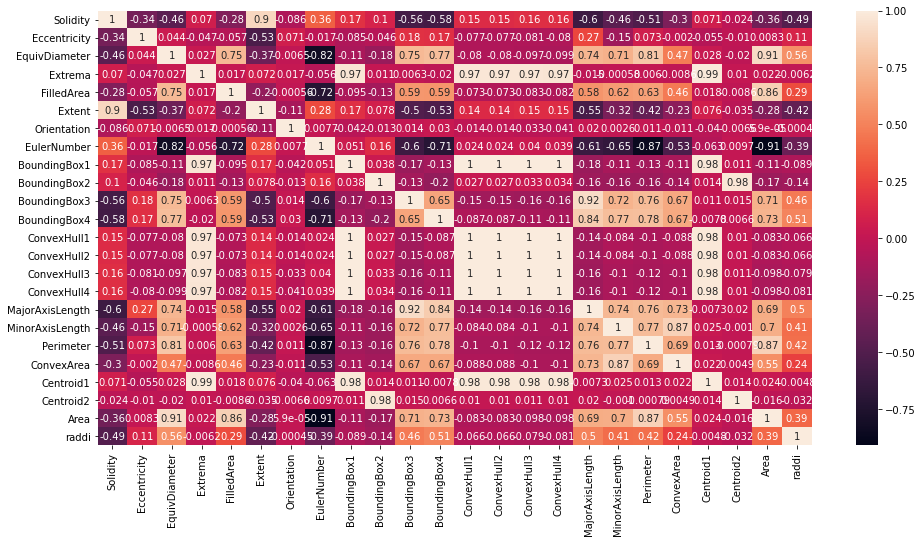

In [35]:
plt.subplots(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

In [36]:
#split and run a baseline tree
X = df.drop('microorganisms', axis=1)
y = df.microorganisms
X_train, X_test, y_train, y_test = train_test_split(X,y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
clf = DecisionTreeClassifier()

score = -cross_val_score(clf, X_train_scaled, y_train, scoring='neg_log_loss', cv=20)
print(score)
print(np.mean(score))

[0.45247305 0.72395689 0.63346227 0.48263792 0.69379201 0.57313253
 0.54296766 0.57313253 0.45247305 0.6032974  0.72395689 0.93511098
 0.57313253 0.78428663 0.6032974  0.69439848 0.48305981 0.27172114
 0.634016   0.69439848]
0.6064351836096151


In [38]:
def getScore(estimator, data, target, labels = None):
    preds = estimator.predict(data)
    results = {}
    results['accuracy'] = accuracy_score(target, preds)
    results['f1'] = f1_score(target, preds, average=None)
    results['recall'] = recall_score(target, preds, average=None)
    results['precision'] = precision_score(target, preds, average=None)
    
    dfResults = pd.DataFrame(results, index=labels)
    #print(dfResults)
    plt.subplots(figsize=(16,8))
    sns.heatmap(dfResults, annot=True, robust=True, cmap='Greens', fmt='0.5g')
    return dfResults

In [39]:
def getConfusionMatrix(estimator, data, target, labels=None):
    preds = estimator.predict(data)
    matrix_raw = confusion_matrix(target, preds)
    dfMatrix = pd.DataFrame(matrix_raw, index=labels, columns=labels)
    plt.subplots(figsize=(16,8))
    sns.heatmap(dfMatrix, annot=True, robust=True, fmt='g')
    return dfMatrix

0.9779911070784904


,accuracy,f1,recall,precision
Aspergillus sp,0.98598,0.975283,0.977296,0.973279
Diatom,0.98598,0.995624,1.000000,0.991285
Penicillum,0.98598,0.988636,1.000000,0.977528
Pithophora,0.98598,0.942989,0.916168,0.971429
Protozoa,0.98598,0.994247,1.000000,0.988561
Raizopus,0.98598,1.000000,1.000000,1.000000
Spirogyra,0.98598,0.913208,0.864286,0.968000
Ulothrix,0.98598,0.985484,0.979690,0.991347
Volvox,0.98598,0.995274,1.000000,0.990593
Yeast,0.98598,0.989166,1.000000,0.978564


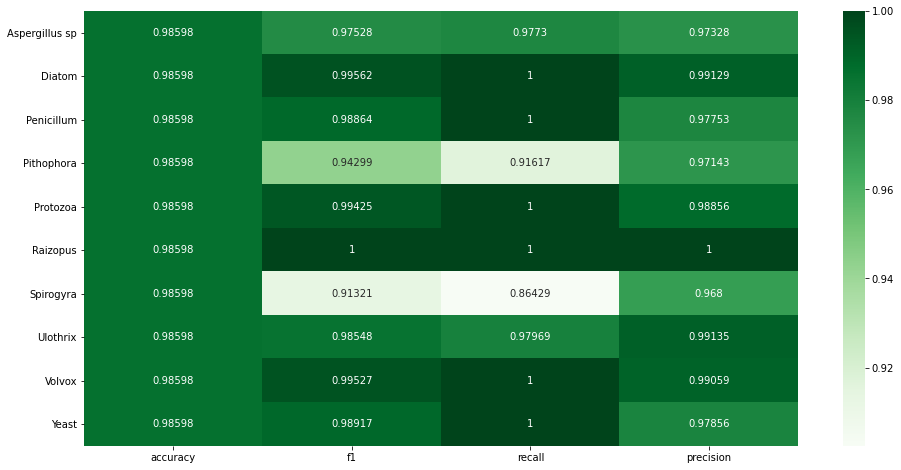

In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

labels = y_test.value_counts().index
labels = labels.sort_values()

testResults = getScore(clf, X_test_scaled,y_test, labels)
print(testResults['f1'].mean())
testResults


In [41]:

#getConfusionMatrix(clf, X_test, y_test, y_test.value_counts().index)

In [42]:
y_test.value_counts()
#y_test.head()

Ulothrix          1871
Volvox            1053
Protozoa          1037
Aspergillus sp     969
Yeast              913
Raizopus           599
Diatom             455
Pithophora         334
Penicillum         261
Spirogyra          140
Name: microorganisms, dtype: int64

In [43]:
#as I figured, the labeling is no good here. class imbalance also an issue
#.value_counts must sort by count automatically
#it seems like confusion matrix does it alphabetically

,Aspergillus sp,Diatom,Penicillum,Pithophora,Protozoa,Raizopus,Spirogyra,Ulothrix,Volvox,Yeast
Aspergillus sp,947,0,0,6,2,0,2,2,2,8
Diatom,0,455,0,0,0,0,0,0,0,0
Penicillum,0,0,261,0,0,0,0,0,0,0
Pithophora,10,2,2,306,4,0,0,8,2,0
Protozoa,0,0,0,0,1037,0,0,0,0,0
Raizopus,0,0,0,0,0,599,0,0,0,0
Spirogyra,4,0,0,1,2,0,121,6,2,4
Ulothrix,12,2,4,2,4,0,2,1833,4,8
Volvox,0,0,0,0,0,0,0,0,1053,0
Yeast,0,0,0,0,0,0,0,0,0,913


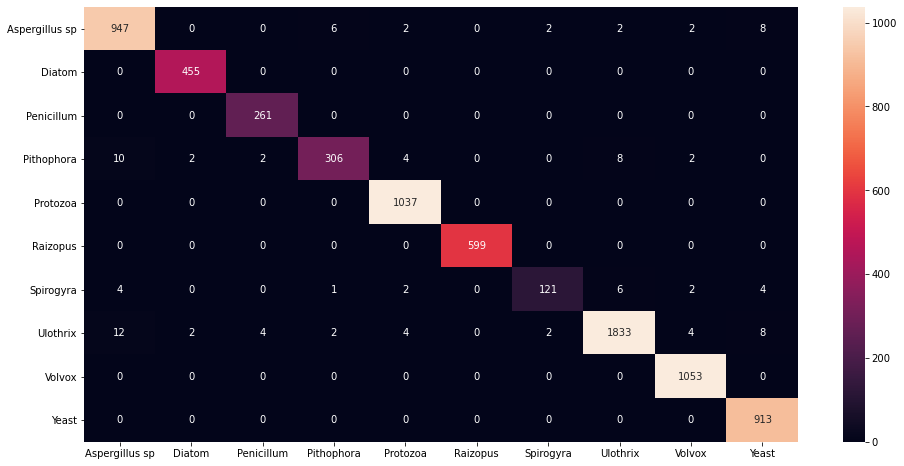

In [44]:
#maybe this will fix the labels

#labels
getConfusionMatrix(clf, X_test_scaled, y_test, labels)

# i wonder if theres any way to scale the colors to ignore the diagonals?
# https://stackoverflow.com/questions/68632474/seaborn-heatmap-doesnt-adjust-colors-based-on-specific-value
# figure this out later

In [45]:
#think the labels are good now
#results look pretty good for a baseline, imbalance is causing a few classes to underperform

y_train.value_counts()

Ulothrix          5549
Volvox            3267
Aspergillus sp    2919
Protozoa          2851
Yeast             2687
Raizopus          1953
Diatom            1363
Pithophora        1016
Penicillum         819
Spirogyra          471
Name: microorganisms, dtype: int64

In [46]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train) 
y_train_resampled.value_counts()

Spirogyra         5549
Pithophora        5549
Yeast             5549
Volvox            5549
Diatom            5549
Penicillum        5549
Aspergillus sp    5549
Raizopus          5549
Ulothrix          5549
Protozoa          5549
Name: microorganisms, dtype: int64

0.9786690602324819


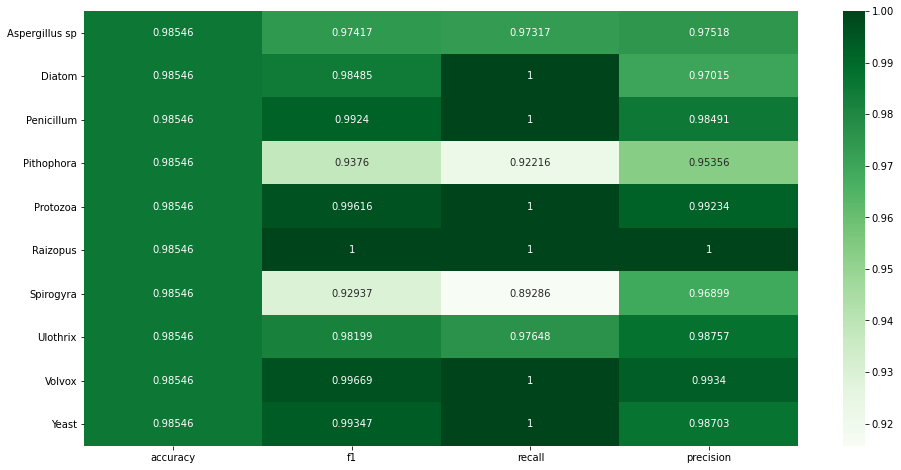

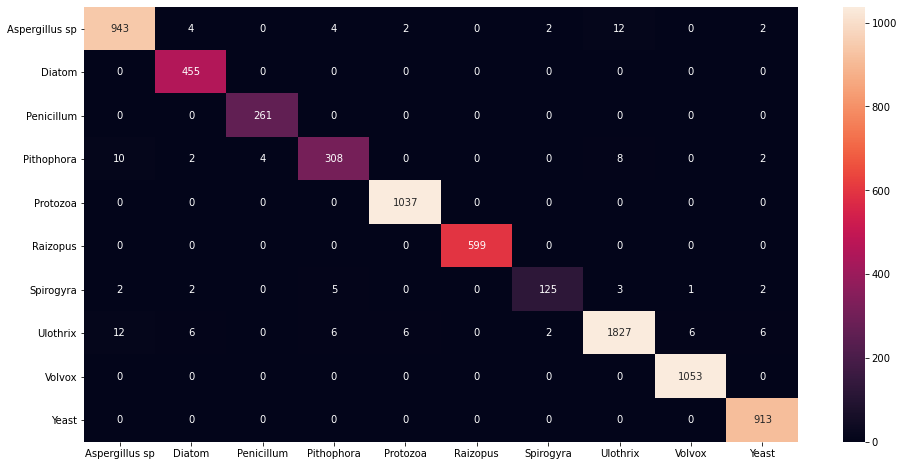

In [47]:
#lets see how this performs
clf = DecisionTreeClassifier()
clf.fit(X_train_resampled, y_train_resampled)

labels = y_test.value_counts().index
labels = labels.sort_values()

testResults = getScore(clf, X_test_scaled,y_test, labels)
print(testResults['f1'].mean())
confMatrix = getConfusionMatrix(clf, X_test_scaled, y_test, labels)

In [48]:
#scaling and resampling had minor impact, still having issues with spirogyra and pithophora


0.9404782577822115


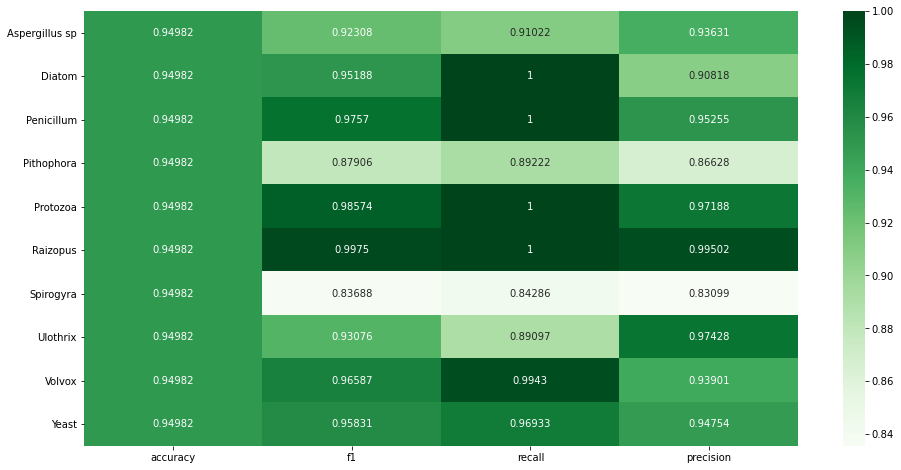

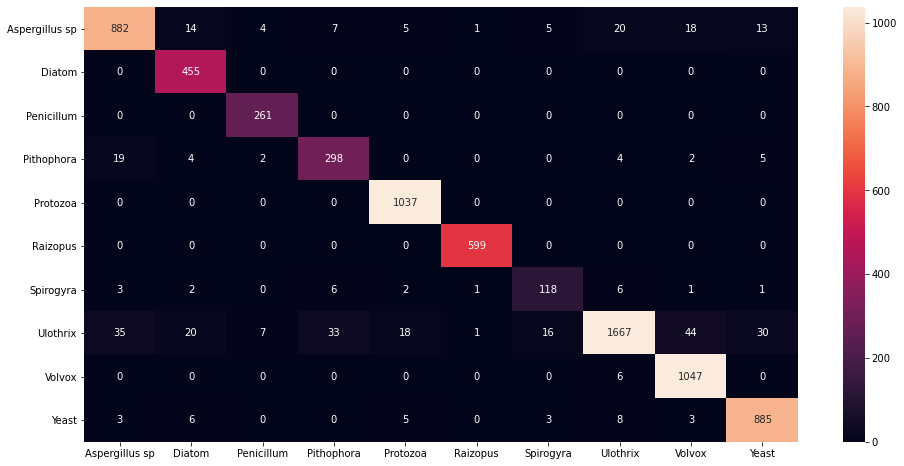

In [49]:
knn_base = KNeighborsClassifier()

knn_base.fit(X_train_resampled, y_train_resampled)

labels = y_test.value_counts().index
labels = labels.sort_values()

testResults = getScore(knn_base, X_test_scaled,y_test, labels)
print(testResults['f1'].mean())
confMatrix = getConfusionMatrix(knn_base, X_test_scaled, y_test, labels)

In [50]:
#baseline knn does worse than baseline tree, knn seems to benefit more from resampling
#tune for k

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = min_k
    best_score = 0
    for k in range(min_k, max_k+1):
        if k % 2 == 1:
            clf = KNeighborsClassifier(n_neighbors=k)

            clf.fit(X_train, y_train)

            test_preds = clf.predict(X_test)
            score = f1_score(y_test, test_preds, average='macro')
            if score > best_score:
                best_score = score
                best_k = k
                
            print('iter', k)
    print('best k:', best_k)
    print('best score:', best_score)
    
find_best_k(X_train_resampled, y_train_resampled, X_test_scaled, y_test)

iter 1
iter 3
iter 5
iter 7
iter 9
iter 11
iter 13
iter 15
iter 17
iter 19
iter 21
iter 23
iter 25
best k: 1
best score: 0.9776550326694438


0.9764211378626084


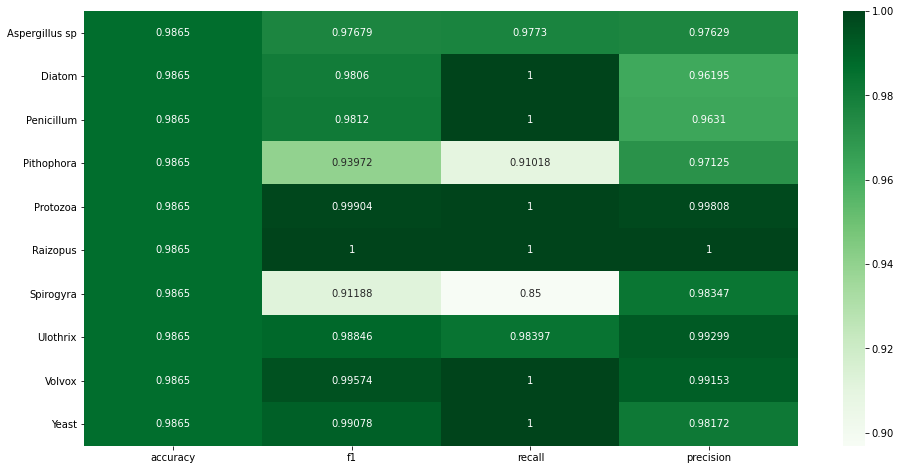

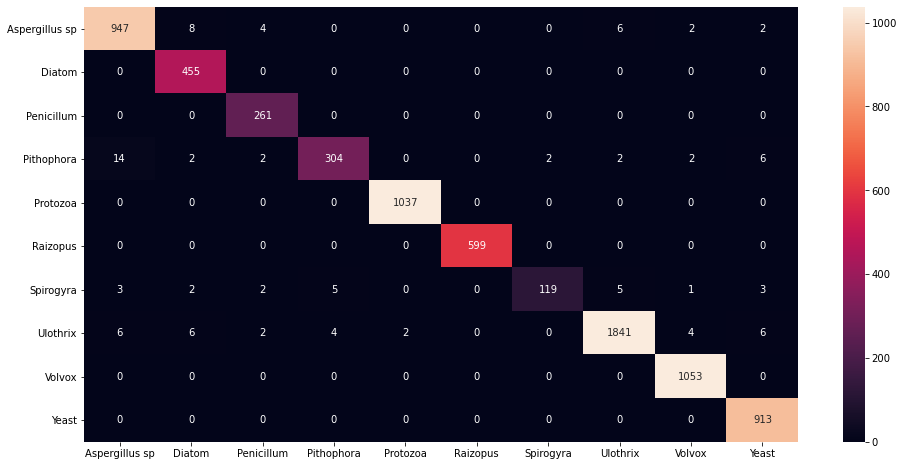

In [51]:
#k = 1 0.9743905473455101
#k = 1, p = 1 0.9755839253489087

knn_tuned = KNeighborsClassifier(n_neighbors=1, p=1)

knn_tuned.fit(X_train_resampled, y_train_resampled)

labels = y_test.value_counts().index
labels = labels.sort_values()

testResults = getScore(knn_tuned, X_test_scaled,y_test, labels)
print(testResults['f1'].mean())
confMatrix = getConfusionMatrix(knn_tuned, X_test_scaled, y_test, labels)

In [52]:
#around as good as baseline tree w/ resampling, ever so slightly worse on our two trouble categories
#seems like this is the best i'll be getting out of knn

0.980420592815344


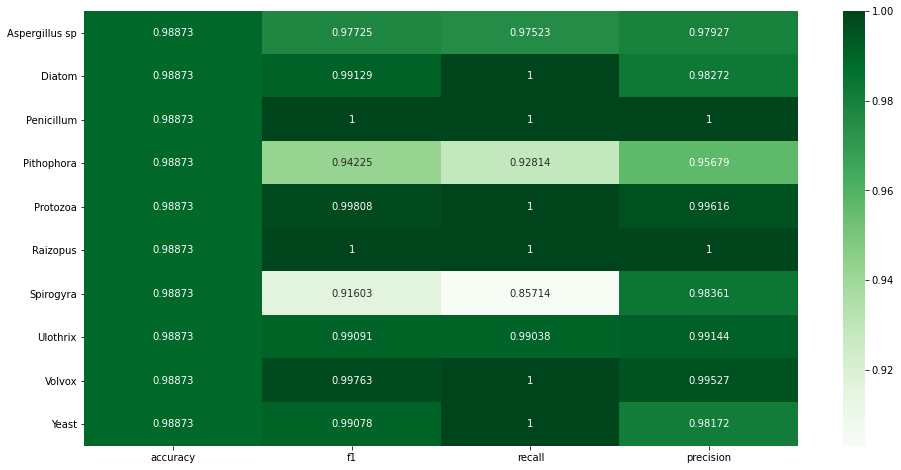

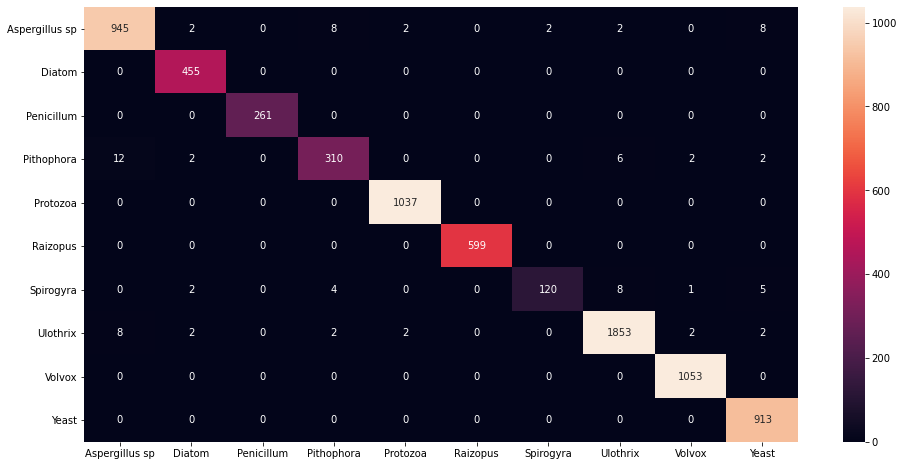

In [54]:
forest_base = RandomForestClassifier()

forest_base.fit(X_train_resampled, y_train_resampled)

labels = y_test.value_counts().index
labels = labels.sort_values()

testResults = getScore(forest_base, X_test_scaled,y_test, labels)
print(testResults['f1'].mean())
confMatrix = getConfusionMatrix(forest_base, X_test_scaled, y_test, labels)

In [67]:
#seems like best results so far. maybe can do better after tuning params?

rf_param_grid = {
    'n_estimators': [30, 50, 80],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

rf_tuned = RandomForestClassifier()
#rf_grid_search = GridSearchCV(rf_tuned, param_grid=rf_param_grid, cv=3, verbose=2)
#rf_grid_search.fit(X_train_scaled, y_train)

#print(rf_grid_search.best_params_)


#{'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 60}
#{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 70}
#{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
#{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
#{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   1.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   1.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   1.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   1.7s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   1.7s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   1.7s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_s

[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   1.6s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   2.6s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   2.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   2.6s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   1.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV] 

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   0.7s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   0.7s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   0.7s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30 


[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.4s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   1.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV] 

[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   1.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.4s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.4s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.4s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   0.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=

[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.9s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.9s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   1.4s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   1.4s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   1.4s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=30 
[CV] 

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.5s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.6s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   0.9s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   0.9s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   0.9s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   5.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   4.9s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   5.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=30, total=   1.9s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=30, total=   1.8s
[CV] criterion=entropy, max_depth=None, min

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   1.8s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   1.8s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   1.8s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   3.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   3.0s
[CV] criterion=entropy, max_depth=

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.6s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.6s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.6s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   1.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   1.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_s

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   1.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   1.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_sam

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.6s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   1.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   1.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   1.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   1.7s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_s

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   1.7s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   1.7s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   1.7s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.7s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.7s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_sampl

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.9s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   1.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   1.6s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   1.6s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   1.6s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_s

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   1.6s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   2.5s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   2.5s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=80, total=   2.5s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   1.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples

[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed: 14.3min finished


{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


0.9815959708996841


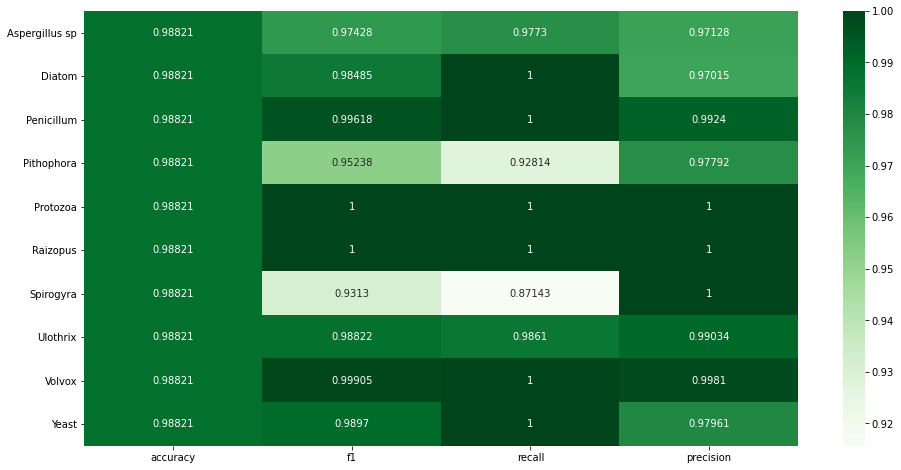

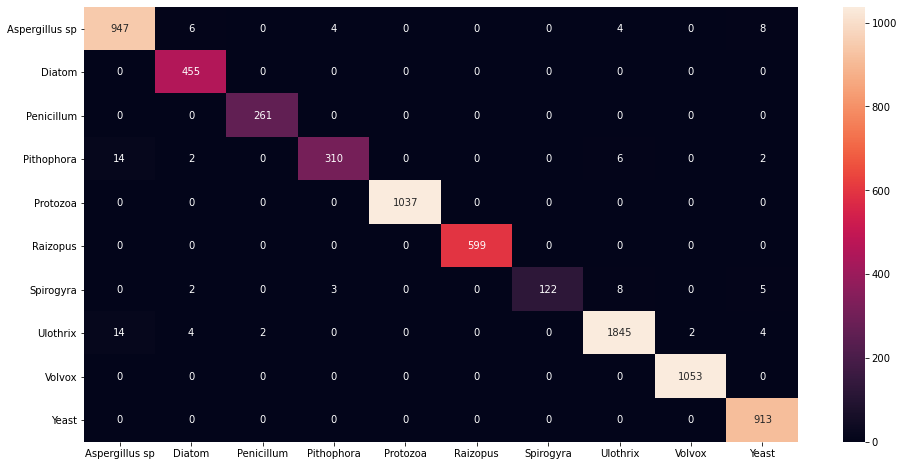

In [71]:
forest_tuned = RandomForestClassifier(n_estimators=50, 
                                      max_depth=None, 
                                      min_samples_leaf=1, 
                                      min_samples_split=2, 
                                      criterion='entropy')

forest_tuned.fit(X_train_resampled, y_train_resampled)

labels = y_test.value_counts().index
labels = labels.sort_values()

testResults = getScore(forest_tuned, X_test_scaled,y_test, labels)
print(testResults['f1'].mean())
confMatrix = getConfusionMatrix(forest_tuned, X_test_scaled, y_test, labels)

In [72]:
#very slight improvement, don't think i can get much more out of forest